# Desafío - Regularización

__Integrantes:__ 

- Yerko Carreño
- Javier Pilasi 
- Daniel Flores
- Francisco Fernandez
- Máximo Oliva
- Rocío Ehijo
- Cristián Contreras


## Preparación del Ambiente de Trabajo
- Importe las librerías básicas
- Importe los métodos asociados a regularización
- Importe la base de datos

In [1]:
# Bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
# from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
# from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
# from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import classification_report
# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error

# import factor_analyzer as factor
import missingno as msngo
import warnings

from IPython.display import display, Markdown

warnings.filterwarnings('ignore')

# Importa base de datos

df = pd.read_csv("winequality-red.csv")

## Análisis exploratorio
- Identifique el tipo de datos de cada columna.
- Identifique outliers univariados y multivariados. Los primeros los puede encontrar realizando boxplots de cada atributo, los segundos estudiando los scatterplot entre pares de atributos.

### Tipo de datos

La base de datos cotiene 12 columnas. Todos los datos son numéricos, la columna `quality` es la variable objetivo y tiene valores: 3, 4, 5, 6, 7 y 8. 

La base de datos no tiene datos nulos.

In [2]:
display(Markdown("#### Tipos de datos de cada columna"))
display(df.info())

display(Markdown("#### Extracto primeros registros base de detos"))
display(df.head())

display(Markdown("#### Repeticiones de columna quality"))
display(pd.DataFrame(df["quality"].value_counts()))

#### Tipos de datos de cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

#### Extracto primeros registros base de detos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Repeticiones de columna quality

,quality
5,681
6,638
7,199
4,53
8,18
3,10


### Identificación de outliers

#### Boxplot para todas las columnas

<Figure size 432x288 with 0 Axes>

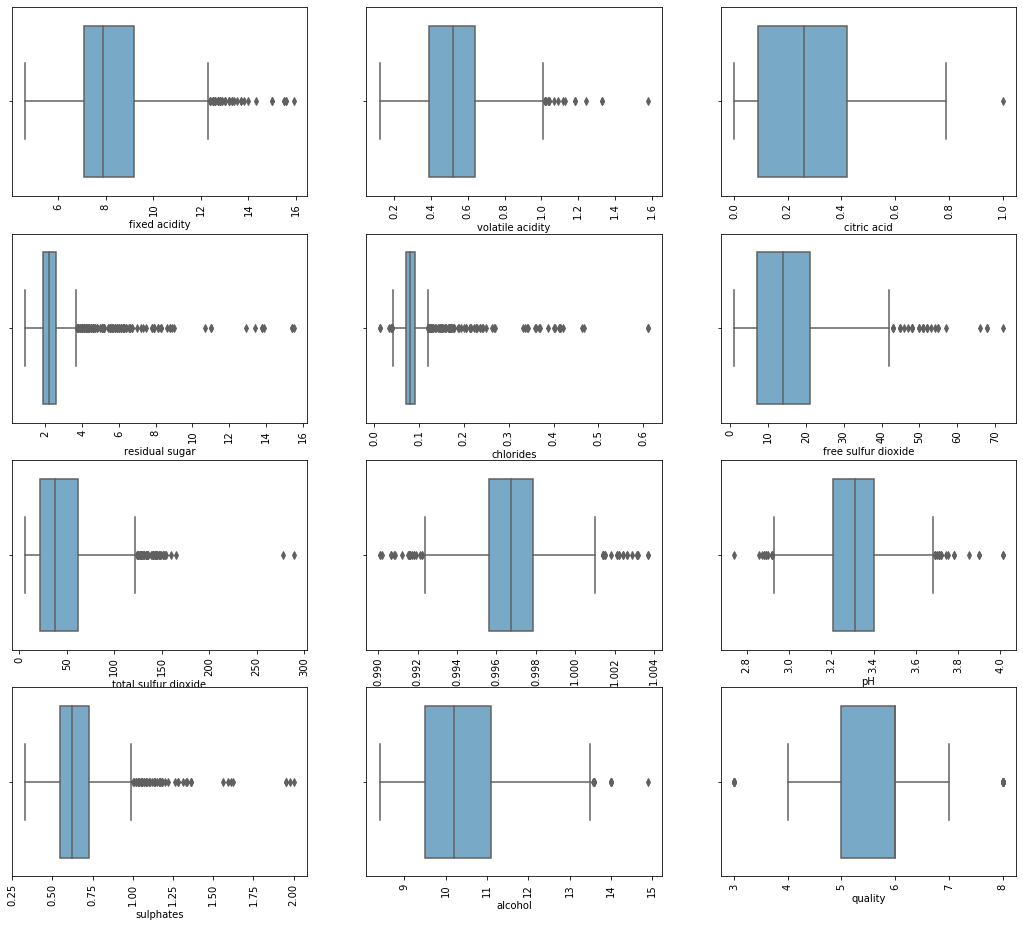

In [3]:
# Almacena por tipo de variable

var_todas = list(df.columns)
var_numericas = list(df.loc[:, var_todas].select_dtypes(
    include=['float64']).columns)
var_categoricas = list(
    df.loc[:, var_todas].select_dtypes(include=['int64']).columns)

# Separa objetivo de atributos

var_objetivo = "quality"
var_atributos = var_todas.copy()
var_atributos.remove(var_objetivo)

# Grafica boxplot para todas las columnas

display(Markdown("#### Boxplot para todas las columnas"))

plt.figure()
fig, ax = plt.subplots(4, 3, figsize=(18, 16))
for variable, subplot in zip(var_todas, ax.flatten()):
    sns.boxplot(x=df[variable], ax=subplot, palette="Blues", orient="h")
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

#### Scatterplot para todas las columnas

<Figure size 1296x1152 with 0 Axes>

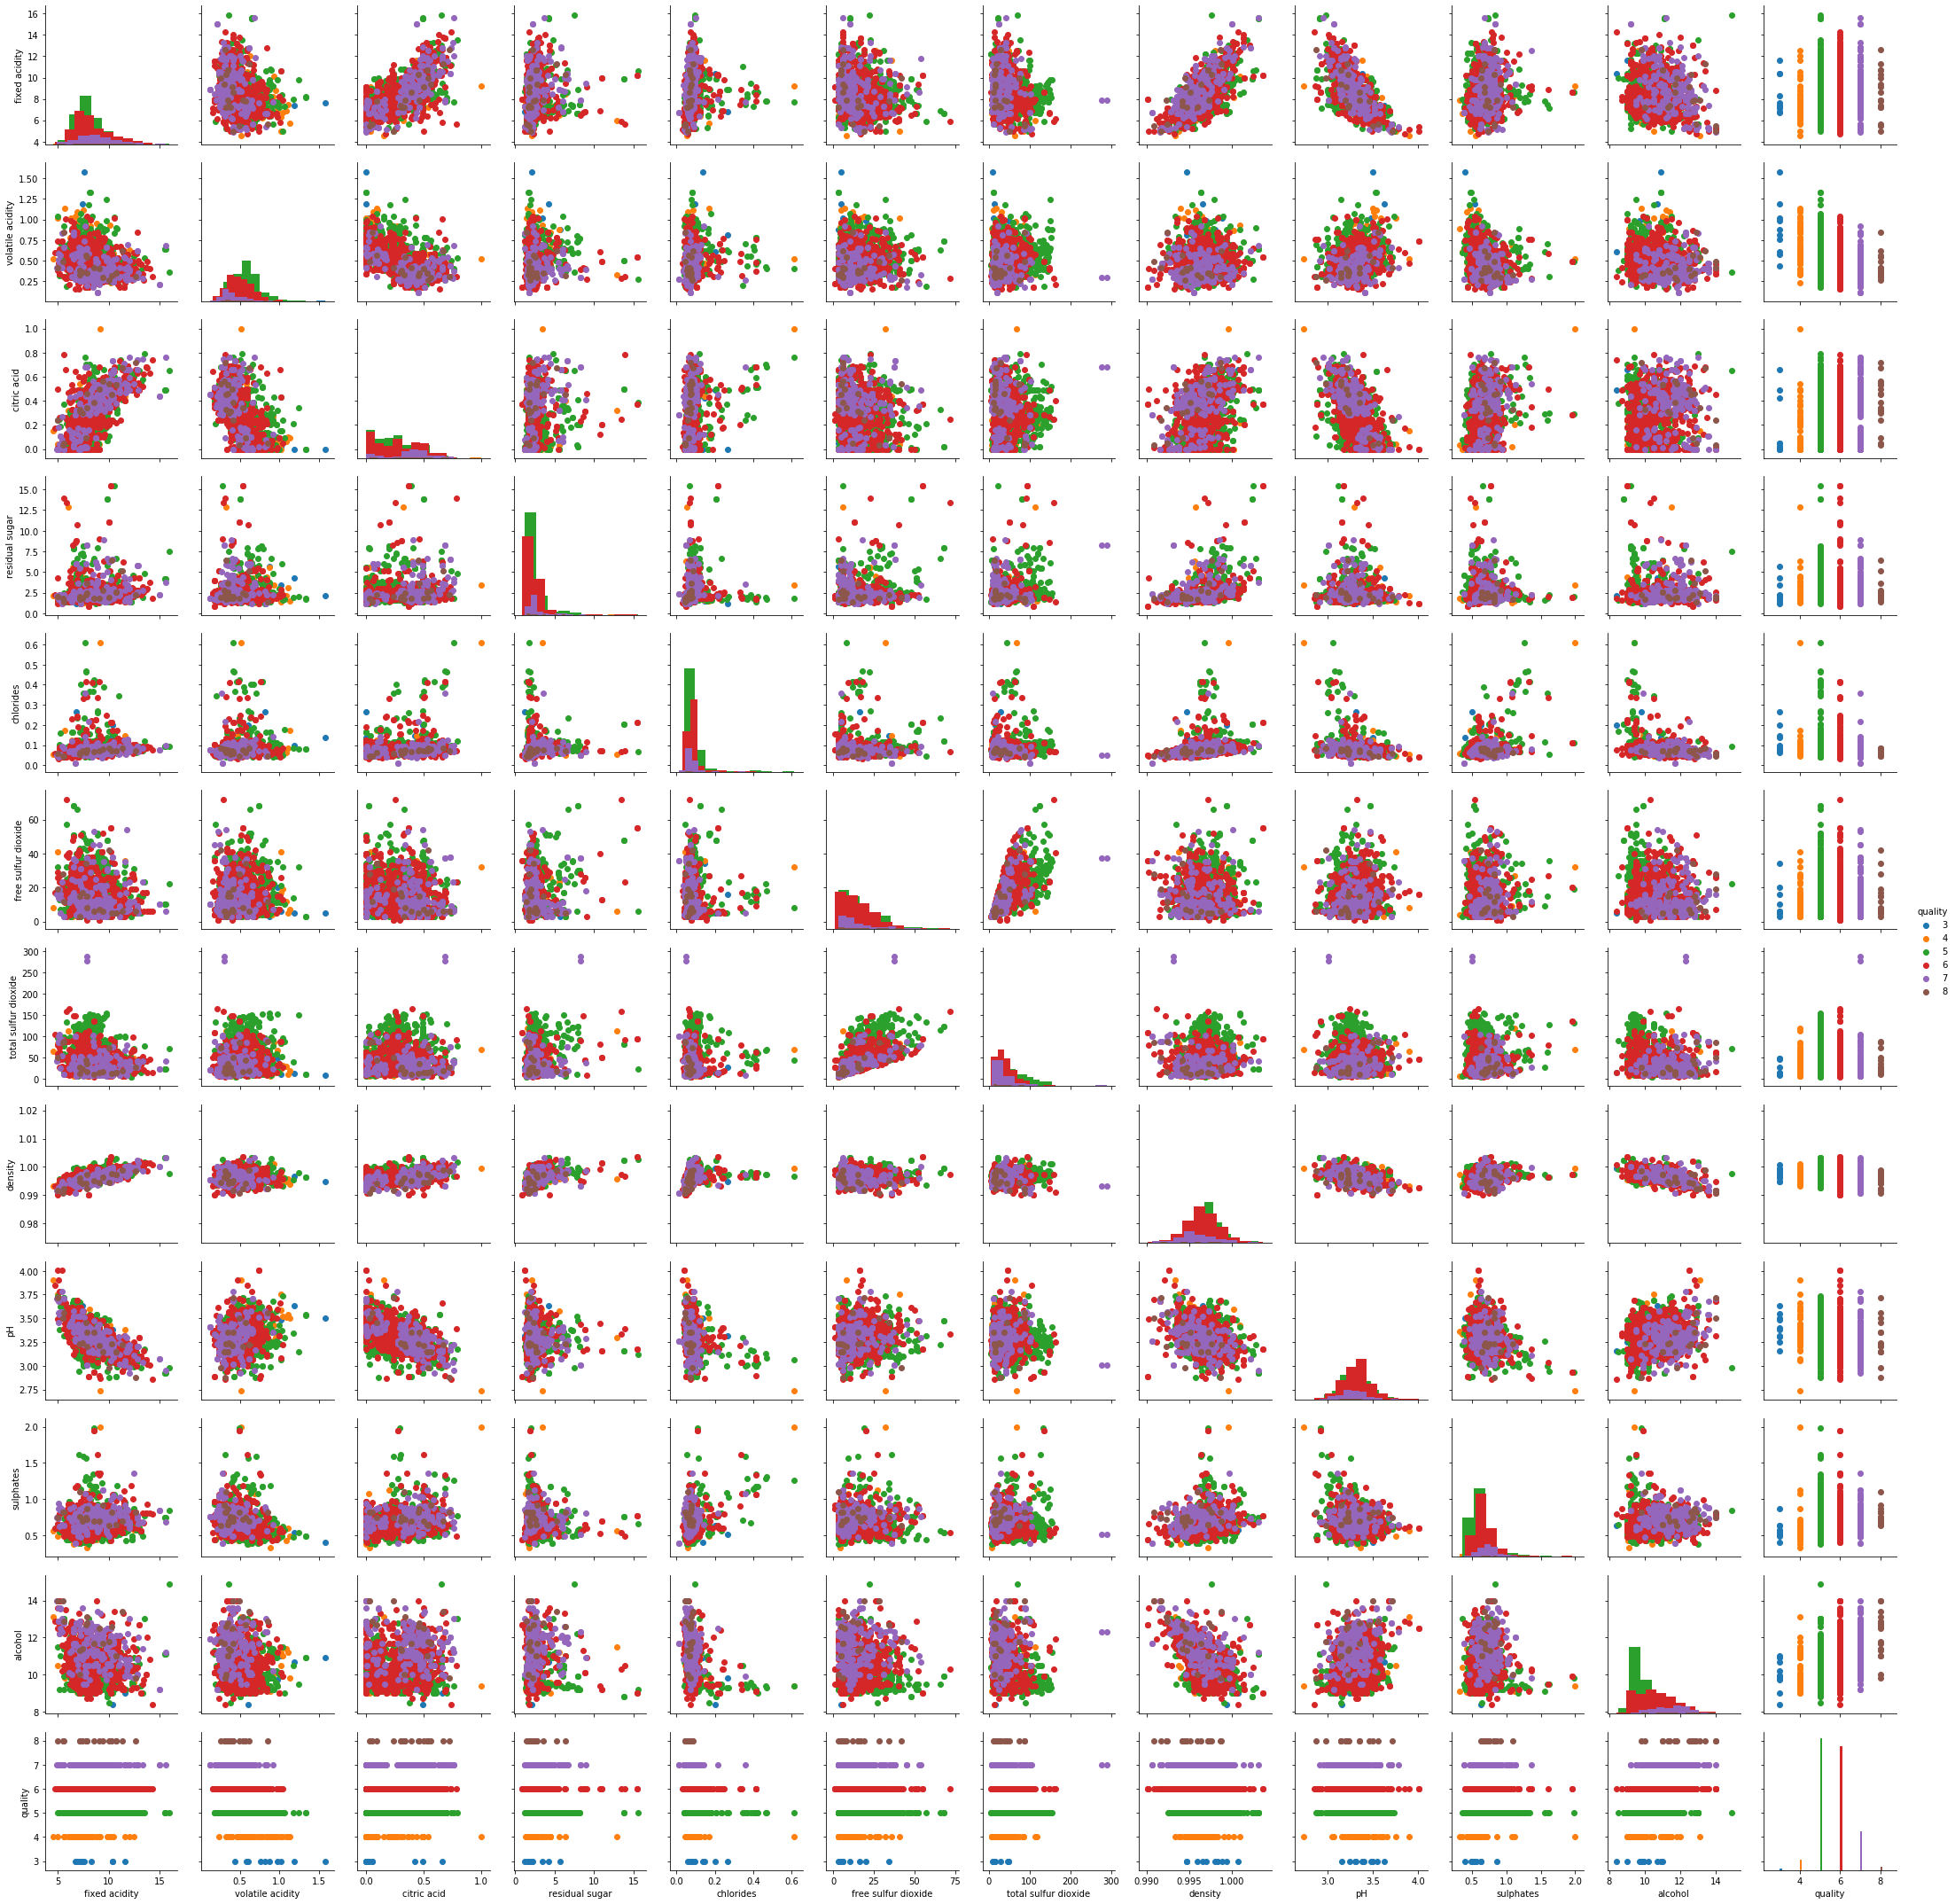

In [4]:
display(Markdown("#### Scatterplot para todas las columnas"))

plt.figure(figsize=(18, 16), )
g = sns.PairGrid(data=df, hue="quality")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();        

### Distribuciones de datos

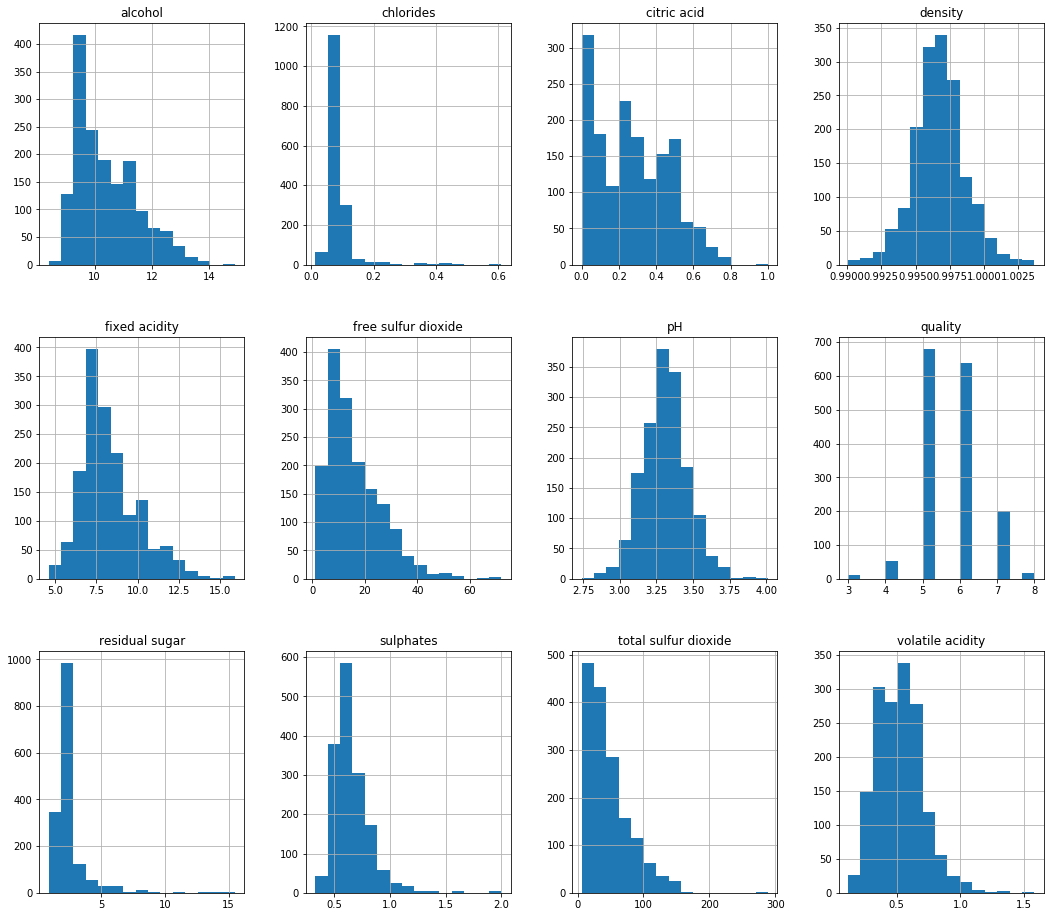

In [5]:
df[var_todas].hist(bins=15, figsize=(18, 16), layout=(3, 4));

A partir de los gráficos de distribuciones y los boxplots: probará como se comportan los datos con una estandarización en todas las columnas o un escalamiento en las variables ´chlorides´, ´residual sugar´, ´total sulfur dioxide´ y ´sulphates´.

### Escalado de variables y gráficos de distribución y boxplots

Para intentar entender como funciona la estandarización y el escalado, primero se escalarán las columnas usando  logaritmo, y se graficarán. En el siguiente caso se estandarizará,  luego se graficará. Finalmente se compararán ambos gráficos. 

In [6]:
# Escala variables

var_a_escalar = ["chlorides", "residual sugar", "total sulfur dioxide", "sulphates"]

df_scaled = df.copy()
df_scaled[var_a_escalar] = np.log(df_scaled[var_a_escalar])

#### Boxplot para todas las columnas

<Figure size 432x288 with 0 Axes>

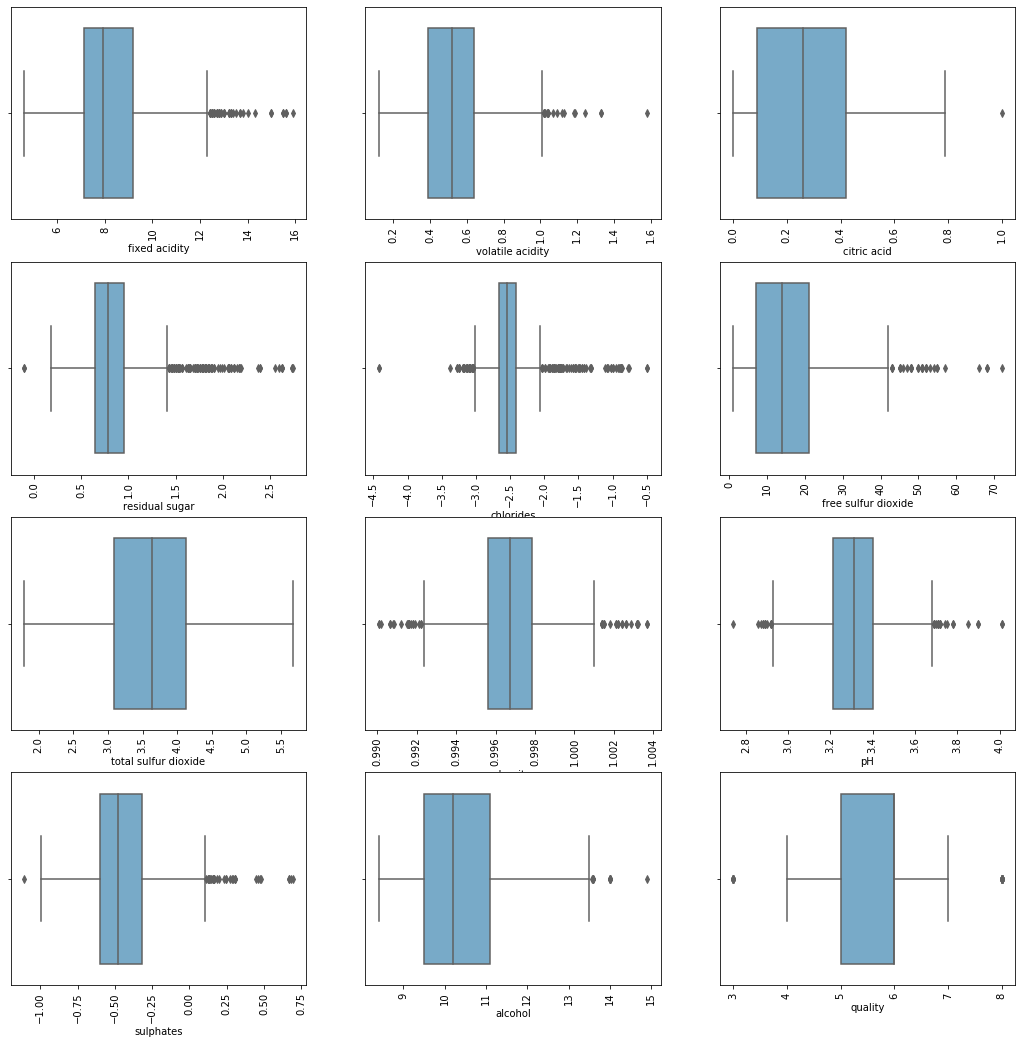

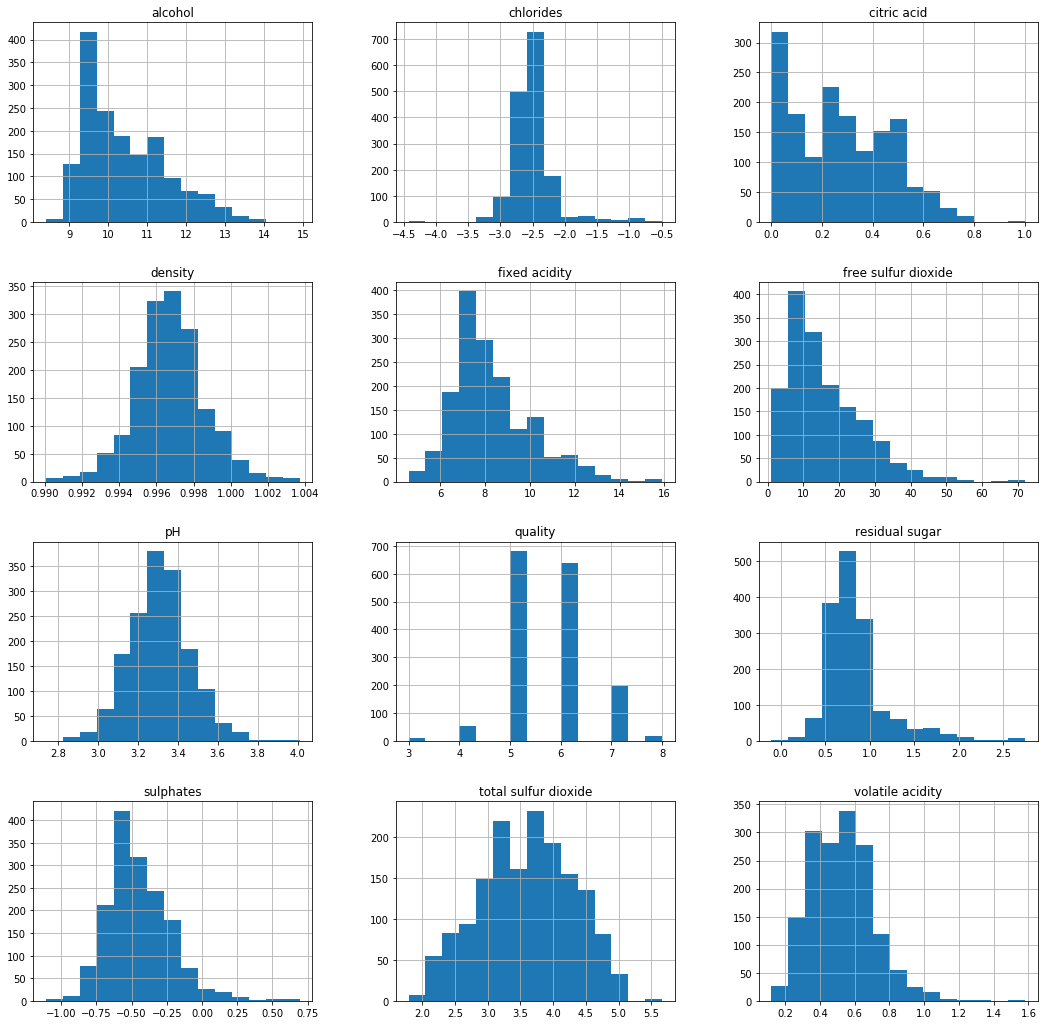

In [7]:
# Grafica boxplot y distribucion para variables escaladas

display(Markdown("#### Boxplot para todas las columnas"))

plt.figure()
fig, ax = plt.subplots(4, 3, figsize=(18, 18))
for variable, subplot in zip(var_todas, ax.flatten()):
    sns.boxplot(x=df_scaled[variable], ax=subplot, palette="Blues", orient="h")
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        
df_scaled[var_todas].hist(bins=15, figsize=(18, 18), layout=(4, 3));

### Estandarización de variables y gráficos de distribución y boxplots

In [8]:
# Escala variables

df_std = df.copy()
df_std = pd.DataFrame(StandardScaler().fit_transform(df_std), columns = var_todas)

#### Boxplot para todas las columnas

<Figure size 432x288 with 0 Axes>

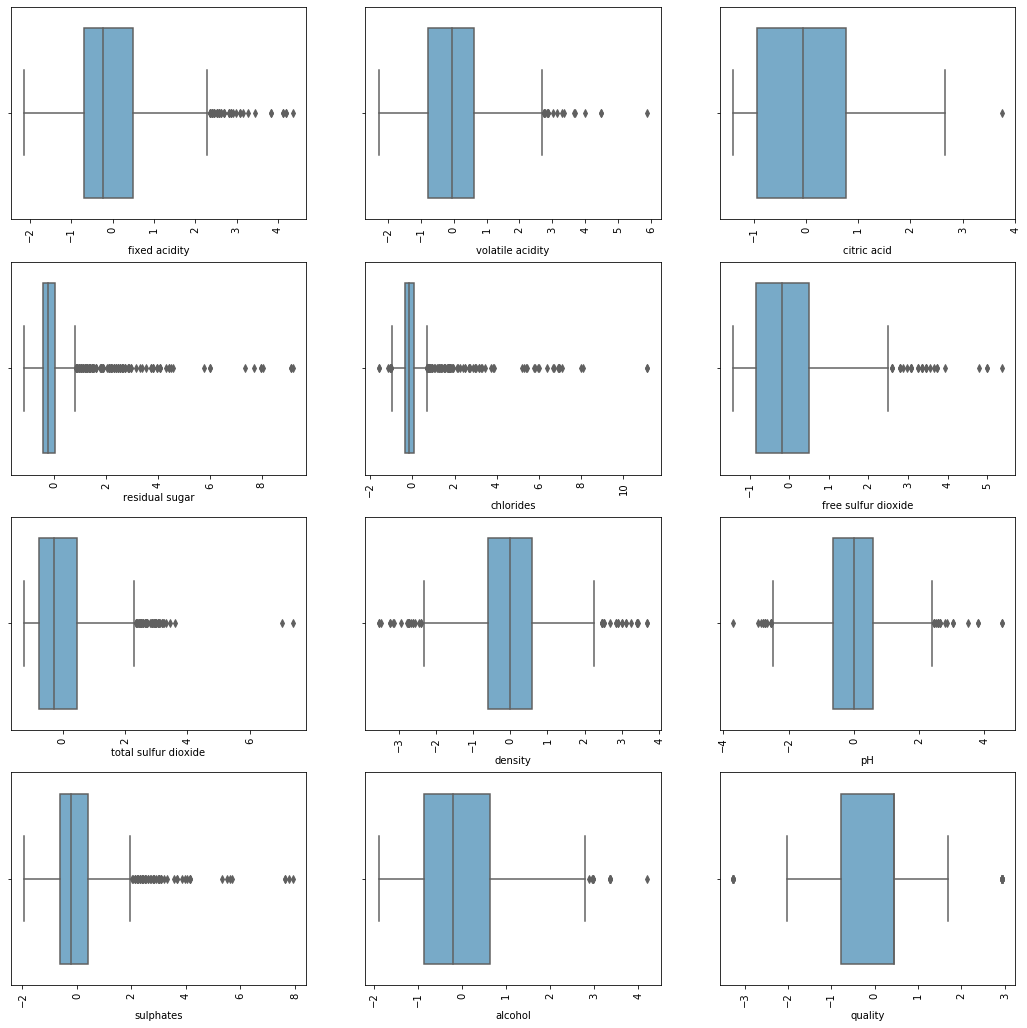

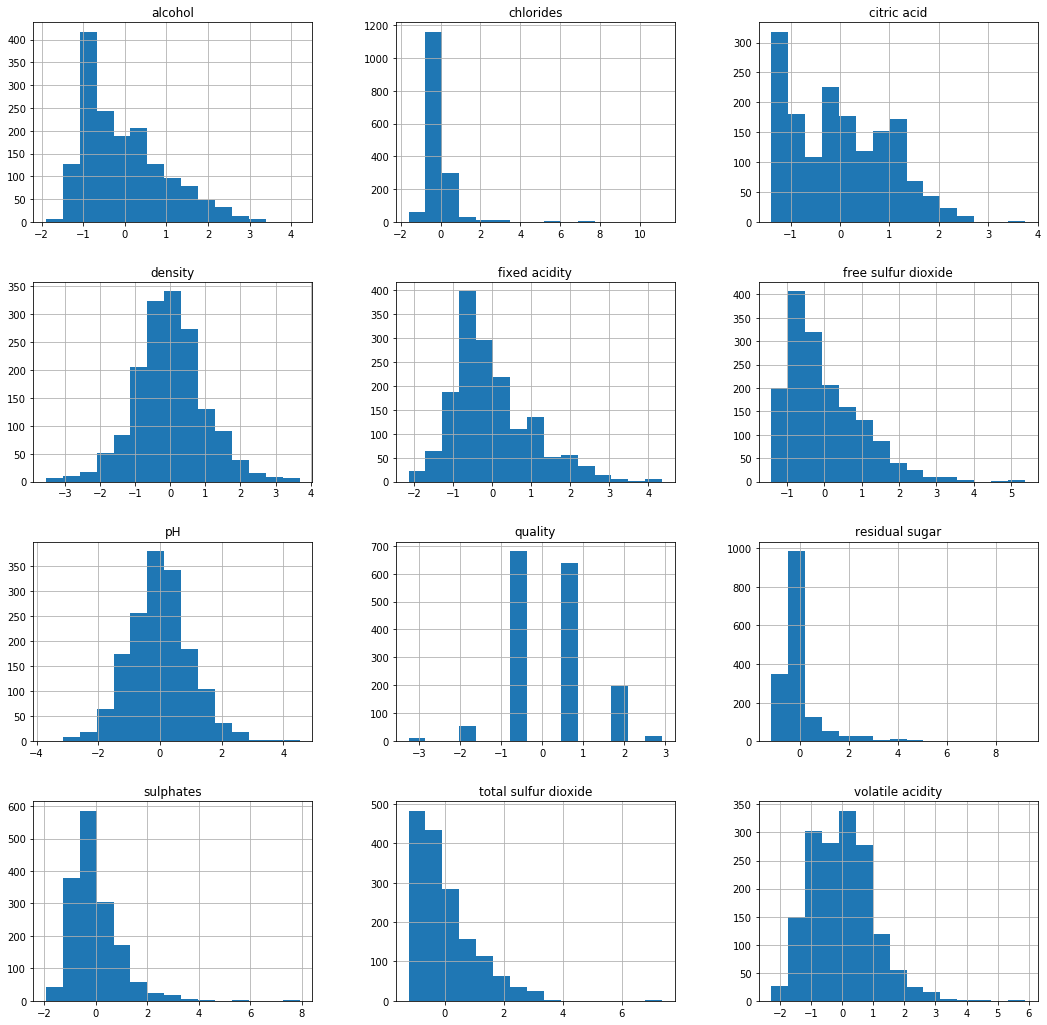

In [9]:
# Grafica boxplot y distribucion para variables escaladas

display(Markdown("#### Boxplot para todas las columnas"))

plt.figure()
fig, ax = plt.subplots(4, 3, figsize=(18, 18))
for variable, subplot in zip(var_todas, ax.flatten()):
    sns.boxplot(x=df_std[variable], ax=subplot, palette="Blues", orient="h")
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        
df_std[var_todas].hist(bins=15, figsize=(18, 18), layout=(4, 3));

Al aplicar la transformación logarítimica se reduce la variabilidad de los datos, incluyendo los outliers.

Además, varios algoritmos de machine learning requieren que los atributos estén en la misma escala para un óptimo rendimiento, que a menudo es conseguido transformando los atributos en el rango de [0, 1] o a una distribución estándar normalizada con media cero y varianza unitaria, esto último fue lo que se realizó.

## Regularización de modelos.

- Genere tres modelos, correspondientes a RidgeCV, LassoCV y ElasticNetCV. Para cada uno de ellos implemente los siguientes pasos:
- Entrene los modelos con 10 validaciones cruzadas.
- Extraiga los coeficientes estimados, el mejor valor alpha, MAE (median_absolute_error) y RMSE (mean_squared_error) asociado a cada modelo.
- En base a la información solicitada, responda lo siguiente:
    - ¿Qué modelo presenta un mejor desempeño en base a las métricas?
    - ¿Qué atributos mantienen un comportamiento similar a lo largo de cada modelo?

In [24]:
# Se define funcion genera modelos para Ridge, Lasso y Elastic y entrega coeficientes y métricas


def get_metricas_coeficientes(data, regularizador):
    X_train, X_test, y_train, y_test = train_test_split(
        data.loc[:, var_atributos],
        data.loc[:, var_objetivo],
        test_size=.33,
        random_state=8643537)

    if regularizador == "Ridge":
        metodo = RidgeCV(cv=10)
    elif regularizador == "Lasso":
        metodo = LassoCV(cv=10)
    elif regularizador == "ElasticNet":
        metodo = ElasticNetCV(cv=10)

    modelo = metodo.fit(X_train, y_train)
    y_hat = modelo.predict(X_test)

    coef = pd.DataFrame(
        data={
            "coeficientes": modelo.coef_
        },
        index=X_test.columns)

    r2 = r2_score(y_test, y_hat)
    mae = median_absolute_error(y_test, y_hat)
    rmse = mean_squared_error(y_test, y_hat)

    return coef, r2, mae, rmse


coef_r1, r2_r1, mae_r1, rmse_r1 = get_metricas_coeficientes(df, "Ridge")
coef_r2, r2_r2, mae_r2, rmse_r2 = get_metricas_coeficientes(df_scaled, "Ridge")
coef_r3, r2_r3, mae_r3, rmse_r3 = get_metricas_coeficientes(df_std, "Ridge")

coef_l1, r2_l1, mae_l1, rmse_l1 = get_metricas_coeficientes(df, "Lasso")
coef_l2, r2_l2, mae_l2, rmse_l2 = get_metricas_coeficientes(df_scaled, "Lasso")
coef_l3, r2_l3, mae_l3, rmse_l3 = get_metricas_coeficientes(df_std, "Lasso")

coef_e1, r2_e1, mae_e1, rmse_e1 = get_metricas_coeficientes(df, "ElasticNet")
coef_e2, r2_e2, mae_e2, rmse_e2 = get_metricas_coeficientes(df_scaled, "ElasticNet")
coef_e3, r2_e3, mae_e3, rmse_e3 = get_metricas_coeficientes(df_std, "ElasticNet")

Luego de obtener todas las métricas y coeficientes, se comparán las métricas RMSE para los casos en que:
1. No se estandarizaron ni se escalaron los datos.
2. Se escalaron los datos de las columnas "chlorides", "residual sugar", "total sulfur dioxide" y "sulphates" usando la transformación logarítmica a algunos datos.
3. Se estandarizaron todos los datos.

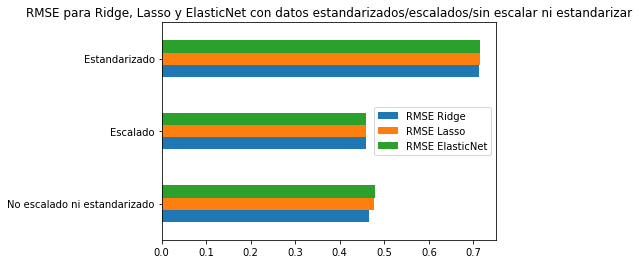

In [25]:
metricas = pd.DataFrame(
    data={
        "RMSE Ridge": (rmse_r1, rmse_r2, rmse_r3),
        "RMSE Lasso": (rmse_l1, rmse_l2, rmse_l3),
        "RMSE ElasticNet": (rmse_e1, rmse_e2, rmse_e3)
    },
    index=["No escalado ni estandarizado", "Escalado", "Estandarizado"])

metricas.plot(
    title="RMSE para Ridge, Lasso y ElasticNet con datos estandarizados/escalados/sin escalar ni estandarizar", kind='barh')

Se puede observar que las métricas no mejoraron por el hecho de escalar o estandarizar los datos, es más en el caso del estandarizado, estás emporeoraron en todos los casos. 

Por tanto, los modelos que se mostrarán las métricas RMSE y MAE será solo para el caso del modelo en que no se escalaron ni estandarizaron sus datos.

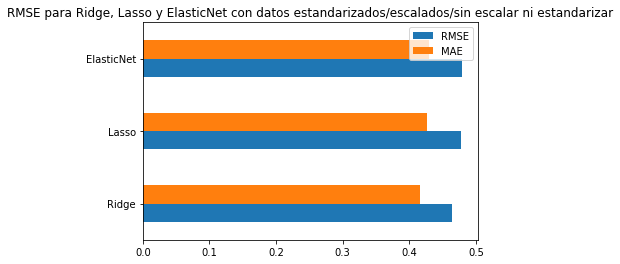

In [26]:
metricas = pd.DataFrame(
    data={
        "RMSE": (rmse_r1, rmse_l1, rmse_e1),
        "MAE": (mae_r1, mae_l1, mae_e1)
    },
    index=["Ridge", "Lasso", "ElasticNet"])

metricas.plot(
    title="RMSE para Ridge, Lasso y ElasticNet con datos estandarizados/escalados/sin escalar ni estandarizar", kind='barh')

In [27]:
coeficientes = pd.concat([coef_r1, coef_l1, coef_e1], axis="columns")
coeficientes.columns = ["Ridge", "Lasso", "ElasticNet"]
display(coeficientes)

,Ridge,Lasso,ElasticNet
fixed acidity,0.007000,0.018260,0.023590
volatile acidity,-1.242800,-1.109932,-0.943319
citric acid,-0.260154,-0.000000,-0.000000
residual sugar,0.004342,-0.000000,-0.000000
chlorides,-1.681345,-0.000000,-0.000000
free sulfur dioxide,0.004700,0.004946,0.005289
total sulfur dioxide,-0.003311,-0.003192,-0.003245
density,0.029897,-0.000000,-0.000000
pH,-0.433724,-0.000000,-0.000000
sulphates,0.637570,0.300191,0.283641


* Se debe aclarar que la métrica utilizada para comparar modelos es el error cuadrático medio.
* Al escalar, o estandarizar el modelo se mantiene o baja el rendimiento comparado con un modelo con datos sin escalar ni estandarizar, por lo que se concluye que no siempre es mejor escalar/estandarizar un modelo, más allá de las presunciones iniciales. 
* En segundo lugar se puede ver que el mejor modelo es Ridge, tanto para escalado como no escalado, ya que en ambos casos RMSE es menor.
* Respecto a la pregunta: ¿Qué atributos mantienen un comportamiento similar a lo largo de cada modelo?
 - Se puede comentar que los atributos penalizados (se hicieron cero) por Lasso/ElasticNet para los modelos no escalados son: `c1itric acid`, `residual sugar`, `chlorides`, `density` y `pH`. 
* Finalmente se puede concluir que no se visualiza una correlación marcada entre lasvariables con mayores outliers y los atributos finalmente penalizados.
